This lab is a quick intro to data analysis and Principal Component Analysis (PCA). We have collected data on tennis players from the ATP series, such as their 1st-serve speed, break-points won, etc. 

http://gerin.perso.math.cnrs.fr/Enseignements/TP_ACP.pdf



# Question 1

In [9]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [10]:
def extractioncsv(fichiercsv): 
    """
This quick function is used to read the data written in a csv file.
We could also have used the pandas.read_csv method

Input: 
    fichiercsv: string, path to the CSV file

Output:
    liste: list, data from the csv file    
    """

    liste = []
    with open(fichiercsv, encoding= 'utf8') as fcsv:
        lecteur = csv.reader(fcsv, delimiter=';')
        for ligne in lecteur:
            liste.append(ligne)
    return liste

TennisChiffres=extractioncsv('Tennis Data.csv')

In [11]:
def convert_to_float(tableau):
# 
    L = tableau
    n = len(tableau[0])
    for i in range (1, len(tableau)):
        for j in range (1, n):
            L[i][j] = float(tableau[i][j])
            
    return L

# Visualisation : Principal Component Analysis

## Question 2

In [12]:
def convert_to_dataframe(tableau):
# Succession of operations in order to convert our np.array to a pandas dataframe

# Input:
#      tableau: np.array, contains our data

#Output:
#      pandas dataframe

####################


    data = convert_to_float(tableau)
    data = np.array(data)
    data[0][0] = 'Players'
    data = pd.DataFrame(data[1:], columns = data[0])
    data.set_index('Players', inplace = True)
    data = data.astype(float)
    return data

In [13]:
data_array = convert_to_float(TennisChiffres)
data = convert_to_dataframe(data_array)
data

,Moyenne 1 er service,Pourcent 1 er service,Balles break sauvees,Balles break gagnees,Pts gagnes 1 er service,Pts gagnes au retour
Players,,,,,,
Bautista,179.0,81.0,84.0,26.0,78.0,63.0
Berdych,189.0,68.0,85.0,26.0,82.0,63.0
Cilic,191.0,70.0,82.0,25.0,86.0,60.0
Del Potro,196.0,78.0,88.0,26.0,90.0,58.0
Dimitrov,195.0,64.0,94.0,19.0,81.0,53.0
...,...,...,...,...,...,...
,178.0,86.0,85.0,29.0,91.0,66.0
,177.0,82.0,83.0,27.0,87.0,66.0
,176.0,86.0,86.0,29.0,88.0,65.0


In [14]:
data.describe()

,Moyenne 1 er service,Pourcent 1 er service,Balles break sauvees,Balles break gagnees,Pts gagnes 1 er service,Pts gagnes au retour
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,183.767677,78.808081,86.595960,26.050505,83.060606,61.070707
std,7.442060,8.839472,3.602491,3.687745,4.332643,6.350723
min,171.000000,60.000000,80.000000,17.000000,71.000000,41.000000
25%,177.000000,71.000000,84.000000,24.000000,81.000000,59.000000
50%,181.000000,81.000000,86.000000,26.000000,83.000000,62.000000
75%,191.000000,86.000000,88.000000,28.500000,85.500000,65.000000
max,197.000000,94.000000,95.000000,34.000000,96.000000,76.000000


In [15]:
def create_correlation_matrix(df):
# Creates the correlation matrix of a dataframe

# Input:
#      df: pandas Dataframe

# Output:
#      correlation_df: pandas Dataframe, correlation matrix of input df

#######################



    len_columns = df.shape[1]
    len_rows = df.shape[0]
    dataframe = df.copy()
    
    for column in df.columns:
        column_mean = df.describe()[column]['mean']
        column_std = df.describe()[column]['std']
        for row in df.index:
            dataframe[column][row] = (df[column][row] - column_mean) / column_std
    
    matrix = np.dot(dataframe.T, dataframe)
    matrix = np.dot(1/len_rows, matrix)
    correlation_df = pd.DataFrame(matrix, index = df.columns, columns = df.columns)
    
    return correlation_df

In [16]:
correlation_matrix = create_correlation_matrix(data)

In [17]:
correlation_matrix

,Moyenne 1 er service,Pourcent 1 er service,Balles break sauvees,Balles break gagnees,Pts gagnes 1 er service,Pts gagnes au retour
Moyenne 1 er service,0.989899,-0.769802,0.542429,-0.654339,0.376047,-0.526476
Pourcent 1 er service,-0.769802,0.989899,-0.441760,0.733447,-0.321994,0.643689
Balles break sauvees,0.542429,-0.441760,0.989899,-0.427289,0.345209,-0.571387
Balles break gagnees,-0.654339,0.733447,-0.427289,0.989899,-0.236000,0.678284
Pts gagnes 1 er service,0.376047,-0.321994,0.345209,-0.236000,0.989899,-0.325777
Pts gagnes au retour,-0.526476,0.643689,-0.571387,0.678284,-0.325777,0.989899


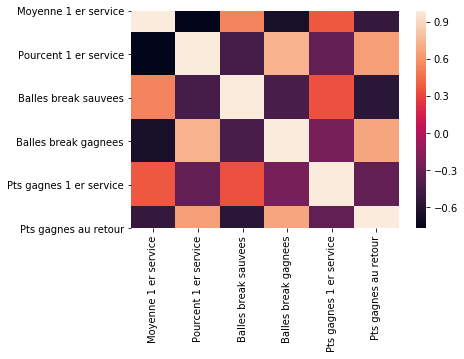

In [18]:
ax = sns.heatmap(correlation_matrix)

# Question 3

In [19]:
def projection (dataframe):

# Using the correlation matrix, we want to project our data following the two principal 
# components. We find them by computing the correlation matrix's eigenvalues

# Input:
#      dataframe: pandas Dataframe, data we want to do the PCA on

# Output:
#      X: np.array, coordinates of datapoints along the axis of the first principal component
#      Y: np.array, coordinates of datapoints along the axis of the second principal component
    df = dataframe.copy()
    df.reset_index(inplace = True)
    correlation_matrix = create_correlation_matrix(dataframe)
    w, v = np.linalg.eig(correlation_matrix)
    u_1 = v[:,0]
    u_2 = v[:,1]
    X = []
    Y = []

    for i in df.index:
        X.append(np.dot(np.array(df.loc[i][1:]), u_1))
        Y.append(np.dot(np.array(df.loc[i][1:]), u_2))
#     plt.scatter(X,Y)
    return X,Y

Text(0.5, 1.0, 'PCA figure of tennis player datapoints')

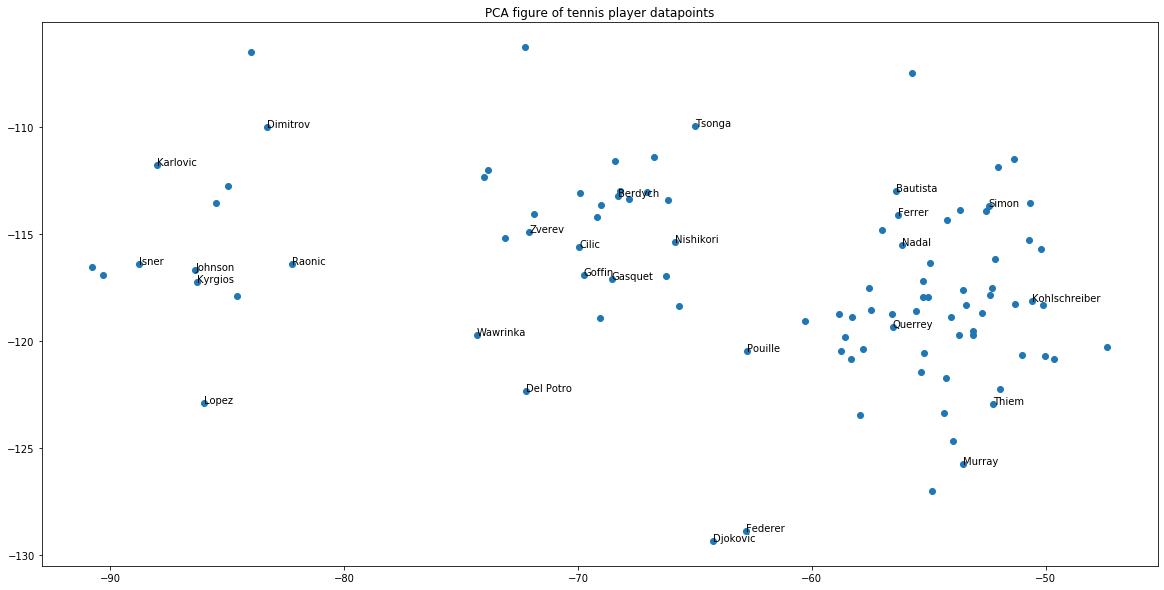

In [30]:
projected_data_1 = projection(data)[0]
projected_data_2 = projection(data)[1]

fig, ax = plt.subplots(figsize = (20,10))

plt.scatter(projected_data_1, projected_data_2)
for i,txt in enumerate(data.index):
    ax.annotate(txt, (projected_data_1[i], projected_data_2[i]))
    
    
plt.title("PCA figure of tennis player datapoints")

# Question 4

In [25]:
def disque_des_correlations():
    
# In this part, we plot the variables factor map of our data

    w, v = np.linalg.eig(correlation_matrix)
    lamda1 = w[0]
    lamda2 = w[1]
    u_1 = v[:,0]
    u_2 = v[:,1]
    p = 6
    X= []
    Y=[]

    for i in range (p):
        ri1 = u_1[i] * np.sqrt(lamda1)
        ri2 = u_2[i] * np.sqrt(lamda2)
        X.append(ri1)
        Y.append(ri2)

    circle = plt.Circle((0,0),1, fill =False)
    fig, ax = plt.subplots()
    ax.scatter(X,Y)
    for i, txt in enumerate(data.columns):
        ax.annotate(txt, (X[i], Y[i]))
    
    ax.set_xlim((-1, 1))
    ax.set_ylim((-1, 1))
    ax.add_artist(circle)
    plt.title("Variables Factor Map")

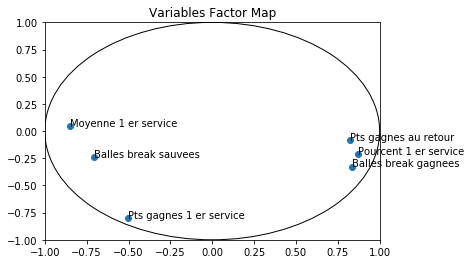

In [26]:
disque_des_correlations()

# Question 5

On observe trois ensembles sur la figure de l'ACP, à gauche, au centre et à droite. On a donc envie de prendre k=3

# Question 6

In [18]:
k = 3 # nombre de clusters

In [ ]:
def getDist(p1, p2):
# gets distance between two points

# Input:
#     p1: np.array((2,1)), vector of coordinates
#     p2: np.array((2,1)), vector of coordinates

# Output:
#      float, distance between p1 and p2

###################


    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)


def getClosest(centers, point):

# gets the index of the closest center from point in centers

# Input:
#      centers: np.array, coordinates of centers
#      point: np.array, coordinates of a given point

# Output:
#      int, index of the center closest to point

###################


    currDist = getDist(centers[0], point)
    currPoint = centers[0]
    currInd = 0
    for i,center in enumerate(centers):
        if getDist(center,point) < currDist:
            currDist = getDist(center,point)
            currPoint = center
            currInd = i
    return currInd



def getBar(points):
    
# Gets the barycentre of a set of points

# Input: 
#      points, np.array, coordinates of a number of points

# Output:
#      np.array with coordinates of barycenter

#####################


    totalx = 0
    totaly = 0
    n = len(points)
    for p in points:
        totalx+=p[0]
        totaly+=p[1]
    return (totalx/n,totaly/n)

In [23]:
def clusters():
# Clusters the data points
    n = data.shape[0]
    L = []
    for i in range(n):
        L.append((A[i],B[i]))


    centers, points = [], []
    for i in range(k): # init centers with first values
        centers.append((A[i], B[i]))
        points.append(set())
    cluster = {}

    for p in L:
        clusterIndex = getClosest(centers,p)
        points[clusterIndex].add(p)
        cluster[p] = clusterIndex

    for i in range(k):
        centers[i] = getBar(points[i])



    while(True): # Until no cluster centre gets changed

        updated = False

        for p in L:
            clusterIndex = getClosest(centers,p)
            formerCluster = cluster[p]
            
            if formerCluster!=clusterIndex:
                points[formerCluster].remove(p)
                points[clusterIndex].add(p)
                cluster[p] = clusterIndex
                centers[formerCluster] = getBar(points[formerCluster])
                centers[clusterIndex] = getBar(points[clusterIndex])
                updated = True

        if not updated: 
            break

    plt.plot(*zip(*centers),'o', color='r')
    printClusters(points)

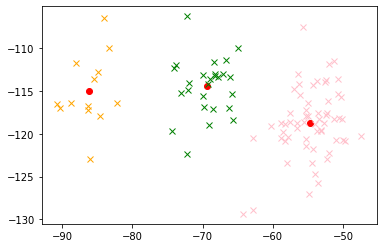

In [24]:
clusters()